In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SalesData.csv')

In [3]:
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


<Axes: xlabel='Temperature', ylabel='Revenue'>

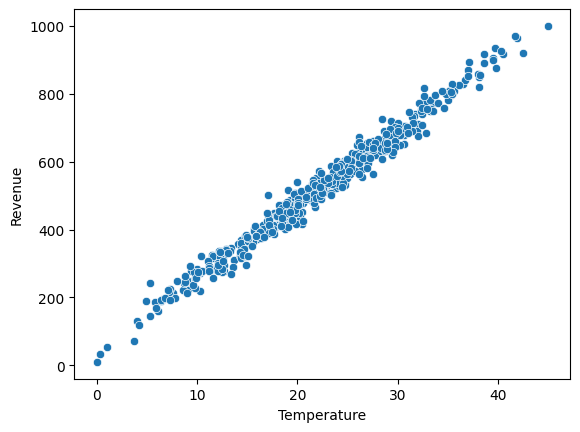

In [7]:
sns.scatterplot(x='Temperature',y='Revenue',data=df)

In [8]:
X=df['Temperature']
y=df['Revenue']

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1,input_shape=[1]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss='mean_squared_error')

In [11]:
epoch_no=model.fit(X,y,epochs=900)

Epoch 1/900
16/16 [==============================] - 1s 2ms/step - loss: 300194.0312
Epoch 2/900
16/16 [==============================] - 0s 2ms/step - loss: 259056.7031
Epoch 3/900
16/16 [==============================] - 0s 1ms/step - loss: 221975.1094
Epoch 4/900
16/16 [==============================] - 0s 2ms/step - loss: 188781.0938
Epoch 5/900
16/16 [==============================] - 0s 2ms/step - loss: 159866.5625
Epoch 6/900
16/16 [==============================] - 0s 2ms/step - loss: 134468.6875
Epoch 7/900
16/16 [==============================] - 0s 1ms/step - loss: 112285.9531
Epoch 8/900
16/16 [==============================] - 0s 2ms/step - loss: 92970.9844
Epoch 9/900
16/16 [==============================] - 0s 2ms/step - loss: 76949.3359
Epoch 10/900
16/16 [==============================] - 0s 1ms/step - loss: 62717.0391
Epoch 11/900
16/16 [==============================] - 0s 2ms/step - loss: 51011.1953
Epoch 12/900
16/16 [==============================] - 0s 2ms/step -

In [12]:
epoch_no.history.keys()

dict_keys(['loss'])

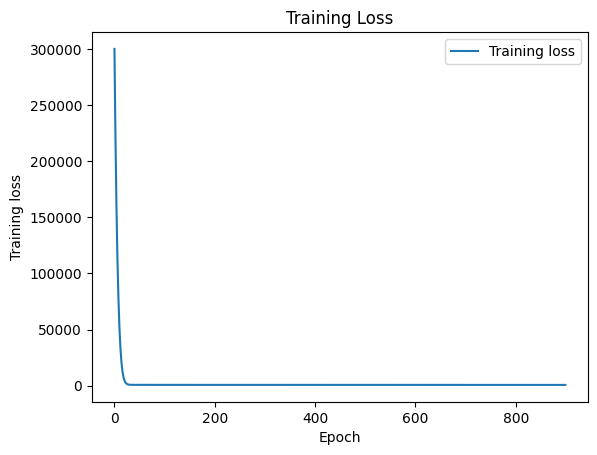

In [13]:
plt.plot(epoch_no.history['loss'])
plt.title('Training Loss')
plt.xlabel("Epoch")
plt.ylabel('Training loss')
plt.legend(['Training loss'])

In [15]:
temp=9
rev=model.predict([temp])
print(rev)

1/1 [==============================] - 0s 53ms/step
[[238.06517]]


16/16 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Final Predictions')

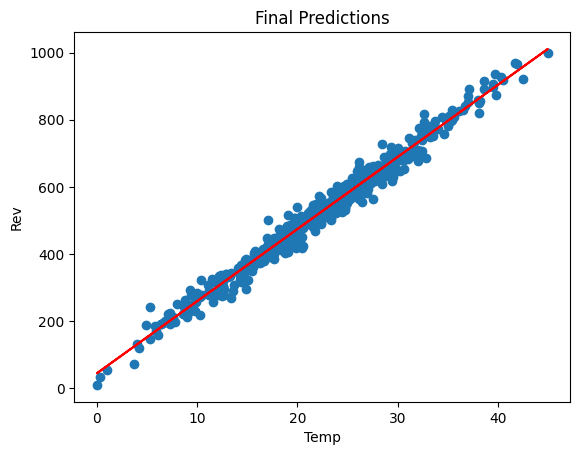

In [18]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),color='red')
plt.ylabel('Rev')
plt.xlabel("Temp")
plt.title('Final Predictions')